Lenet-5: https://sh-tsang.medium.com/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17


In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import img_to_array, array_to_img
import cv2

import zipfile 
import tarfile 

from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
!nvidia-smi -L 
device_name = tf.test.gpu_device_name() 
if device_name != '/device:GPU:0': 
  raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name)) 
!nvidia-smi from google.colab

GPU 0: Tesla T4 (UUID: GPU-5298882c-807e-6ea7-eeed-e5d328f89b17)
Found GPU at: /device:GPU:0
Invalid combination of input arguments. Please run 'nvidia-smi -h' for help.



Created lenet-5, pretraining it 

![picture](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*yG2c7PQQCRG0gL6ncfoQCg.png)

In [3]:
# Define the class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Show the first n images
def show_first_10(x_train, y_train, n = 10): 
  plt.figure(figsize=(8, 8))
  for i in range(10):
      plt.subplot(5, 5, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      #plt.imshow(x_train[i], cmap=plt.cm.binary)
      plt.imshow(x_train[i])
      plt.xlabel(class_names[y_train[i]])
  plt.show()

In [4]:
# Plot the training and validation accuracy and loss curves
def plot_curves(history, metrics_type):
  plt.figure(figsize=(8, 3))
  plt.subplot(1, 2, 1)
  if metrics_type == "accuracy":
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
  if metrics_type == "mae":
    plt.plot(history.history['mae'], label='Train')
    plt.plot(history.history['val_mae'], label='Test')
    plt.title('Model mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Test')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)


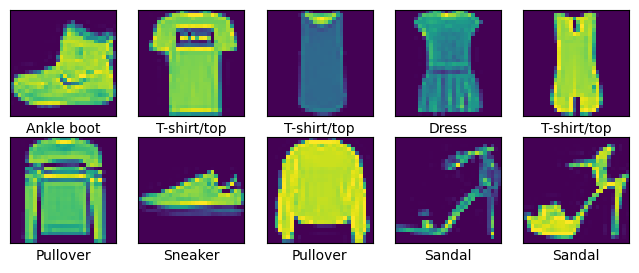

((60000, 32, 32, 1), (10000, 32, 32, 1))


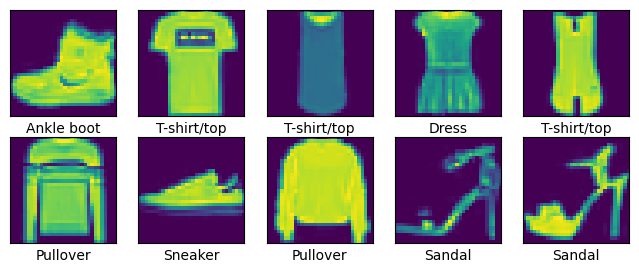

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the input data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_train.shape)

# Reshape the input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)

show_first_10(x_train,y_train)

# Resize the images to 32x32
x_train_resized = np.array([cv2.resize(img, (32, 32)) for img in x_train])
x_test_resized = np.array([cv2.resize(img, (32, 32)) for img in x_test])

# Reshape the input data
x_train_resized = x_train_resized.reshape(-1, 32, 32, 1)
x_test_resized = x_test_resized.reshape(-1, 32, 32, 1)

print(f"{x_train_resized.shape, x_test_resized.shape}")

show_first_10(x_train_resized,y_train)

x_train, x_test = x_train_resized, x_test_resized


In [14]:
#  layers.Conv2D(6, kernel_size=5, activation="relu", input_shape=(32, 32, 1)),
#         layers.MaxPooling2D(pool_size=2),
#         layers.Conv2D(16, kernel_size=5, activation="relu"),
#         layers.MaxPooling2D(pool_size=2),
#         layers.Flatten(),
#         layers.Dense(120, activation="relu"),
#         layers.Dense(84, activation="relu"),
#         layers.Dense(10, activation="softmax"),

# Define the LeNet-5 model
tf.compat.v1.reset_default_graph()
model = keras.Sequential(
    [
        layers.Conv2D(16, kernel_size=5, activation="relu", input_shape=(32, 32, 1)),
        layers.MaxPooling2D(pool_size=2),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10, activation="softmax"),
    ]
)

# model = keras.Sequential()
# model.add(layers.Conv2D(6, kernel_size=5, activation="relu", input_shape=(32, 32, 1)))
# model.add()
# model.add(layers.Flatten(), name='dense2'))


# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy", optimizer = keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                        

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True, expand_nested=True, show_layer_activations=True)

Epoch 1/50
422/422 - 6s - loss: 0.5421 - accuracy: 0.8031 - val_loss: 0.4027 - val_accuracy: 0.8535 - 6s/epoch - 15ms/step
Epoch 2/50
422/422 - 2s - loss: 0.3934 - accuracy: 0.8562 - val_loss: 0.3248 - val_accuracy: 0.8802 - 2s/epoch - 5ms/step
Epoch 3/50
422/422 - 3s - loss: 0.3527 - accuracy: 0.8711 - val_loss: 0.3117 - val_accuracy: 0.8812 - 3s/epoch - 7ms/step
Epoch 4/50
422/422 - 2s - loss: 0.3382 - accuracy: 0.8774 - val_loss: 0.3120 - val_accuracy: 0.8858 - 2s/epoch - 6ms/step
Epoch 5/50
422/422 - 2s - loss: 0.3158 - accuracy: 0.8857 - val_loss: 0.2915 - val_accuracy: 0.8920 - 2s/epoch - 6ms/step
Epoch 6/50
422/422 - 2s - loss: 0.3092 - accuracy: 0.8883 - val_loss: 0.2816 - val_accuracy: 0.8942 - 2s/epoch - 5ms/step
Epoch 7/50
422/422 - 2s - loss: 0.2956 - accuracy: 0.8924 - val_loss: 0.2892 - val_accuracy: 0.8887 - 2s/epoch - 6ms/step
Epoch 8/50
422/422 - 3s - loss: 0.2903 - accuracy: 0.8939 - val_loss: 0.2574 - val_accuracy: 0.9048 - 3s/epoch - 7ms/step
Epoch 9/50
422/422 - 2s

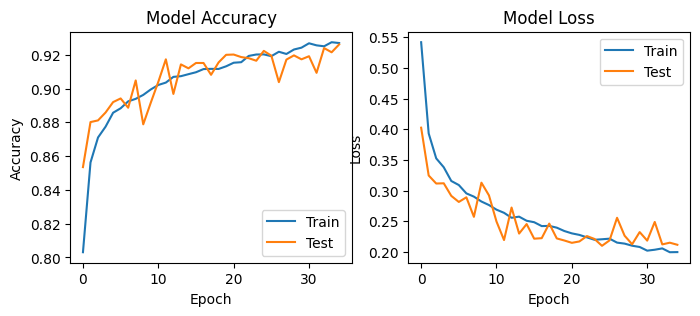

In [15]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1,
          verbose = 2,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose = 1)]
          ) 

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc}")
plot_curves(history, "accuracy")

In [ ]:
plot_curves(history, "accuracy")

Test accuracy: 0.8944000005722046 - Default LeNet-5

Test accuracy: 0.9204000234603882 - Modified


Removing dense layers, leaving only feature extractors:
https://stackoverflow.com/questions/41668813/how-to-add-and-remove-new-layers-in-keras-after-loading-weights


In [16]:
from keras.models import Model

model2 = Model(inputs=model.input, outputs=model.get_layer("flatten").output)
model2.summary()
model = model2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0     

In [ ]:
#model.save('/content/drive/MyDrive/dataset/')

In [33]:
from keras.layers import concatenate

img_a_in = tf.keras.layers.Input(shape = x_train.shape[1:], name = 'ImageA_Input')
img_b_in = tf.keras.layers.Input(shape = x_train.shape[1:], name = 'ImageB_Input')

img_a_feat = model(img_a_in)
img_b_feat = model(img_b_in)

features = concatenate([img_a_feat, img_b_feat], name = 'features')
features = tf.keras.layers.Dense(16, activation='relu')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Dropout(0.3)(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(4, activation='relu')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Dropout(0.2)(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(1, activation='sigmoid')(features)

siamese_model = tf.keras.models.Model(inputs = [img_a_feat, img_b_feat], outputs = [features], name = 'Siamese_model')

siamese_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.05), loss = 'binary_crossentropy', metrics = ['mae'])

siamese_model.summary()

Model: "Siamese_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1152)]       0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1152)]       0           []                               
                                                                                                  
 features (Concatenate)         (None, 2304)         0           ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 16)           36880       ['features[1][0]']   

In [32]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
train_class_names = np.unique(y_train)
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_test)]

print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])
print(train_class_names)
print(class_names)

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[0 1 2 3 4 5 6 7 8 9]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [28]:
def gen_random_batch(in_groups, batch_halfsize = 3):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        # for c_idx in group_idx:
        #   temp = np.random.choice(range(in_groups[c_idx].shape[0]))
        #   print(temp)
        #   out_img_a += [in_groups[c_idx][temp]]
                        
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize

        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]

    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

1/1 [==============================] - 0s 91ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 20ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 20ms/step
(2, 32, 32, 1)


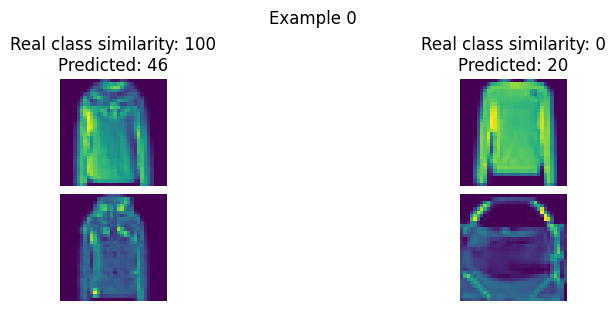

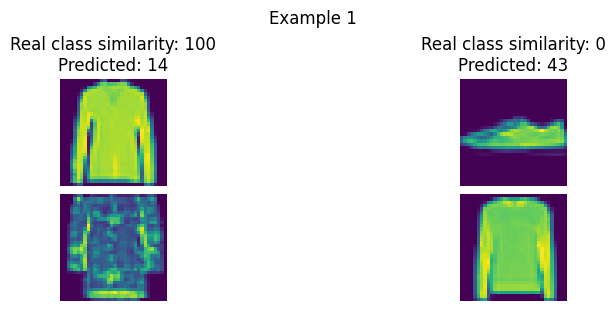

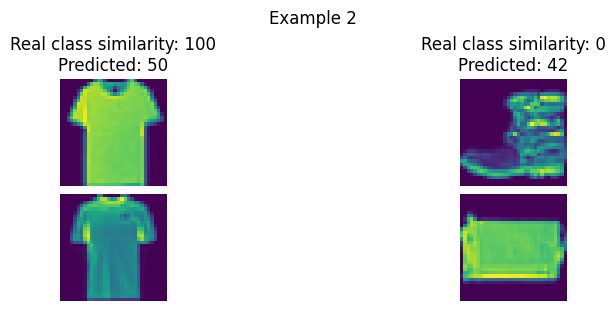

In [29]:
def show_model_output(nb_examples, n = 0):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples) # group a, b, similar_real x2
    pred_sim = siamese_model.predict([model.predict(pv_a), model.predict(pv_b)])

    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (8, 3), constrained_layout=True)
    print(pv_a.shape)
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        #ax1.set_title(f'Example 1')
        #ax1.set_xlabel("set dsadasdas1")
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.axis('off')
        ax1.set_title(f'Real class similarity: { 100 * c_d }\nPredicted: {int( 100 * p_d[0] )}')

    fig.suptitle(f'Example {n}', fontsize=12)
    return fig
# a completely untrained model


for i in range(3):
  _ = show_model_output(1, i)

#plt.xlabel(class_names[y_train[i]])

In [ ]:
print(train_groups[0].shape[0])

6000


In [ ]:
# history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_split=0.1,
#           verbose = 2,
#           callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose = 1)]
#           ) 

In [34]:
batch_size = 1024
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(in_groups, batch_size//2)
        yield [model.predict(pv_a), model.predict(pv_b)], pv_sim

valid_a, valid_b, valid_sim = gen_random_batch(test_groups, test_groups[0].shape[0]//4)

loss_history = siamese_model.fit(siam_gen(train_groups, train_groups[0].shape[0]//4),
    steps_per_epoch = train_groups[0].shape[0]//batch_size,
    #batch_size = 1,
    validation_data=([model.predict(valid_a), model.predict(valid_b)],
    valid_sim),
    epochs = 10,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose = 1)],
    verbose = 1)

47/47 [==============================] - 0s 2ms/step
Epoch 1/10
5/5 [==============================] - 11s 2s/step - loss: 0.7273 - mae: 0.4815 - val_loss: 1.3401 - val_mae: 0.3717
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 0.6484 - mae: 0.4612 - val_loss: 0.7830 - val_mae: 0.3462
Epoch 3/10
5/5 [==============================] - 9s 2s/step - loss: 0.6142 - mae: 0.4424 - val_loss: 0.8038 - val_mae: 0.3236
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.5851 - mae: 0.4180 - val_loss: 0.7633 - val_mae: 0.2858
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 0.5418 - mae: 0.3844 - val_loss: 0.8374 - val_mae: 0.2595
Epoch 6/10
5/5 [==============================] - 9s 2s/step - loss: 0.5289 - mae: 0.3652 - val_loss: 0.8176 - val_mae: 0.2475
Epoch 7/10
5/5 [==============================] - 9s 2s/step - loss: 0.5083 - mae: 0.3484 - val_loss: 0.6048 - val_mae: 0.2353
Epoch 8/10
5/5 [==============================] - 7s 2s/

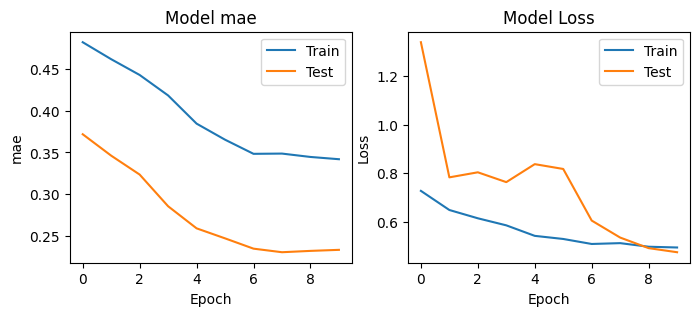

In [35]:
plot_curves(loss_history, "mae")

In [ ]:
siamese_model.save('/content/drive/MyDrive/dataset/')

1/1 [==============================] - 0s 83ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 24ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 29ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 19ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 21ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 24ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 18ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 23ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 19ms/step
(2, 32, 32, 1)
1/1 [==============================] - 0s 19ms/step
(2, 32, 32, 1)


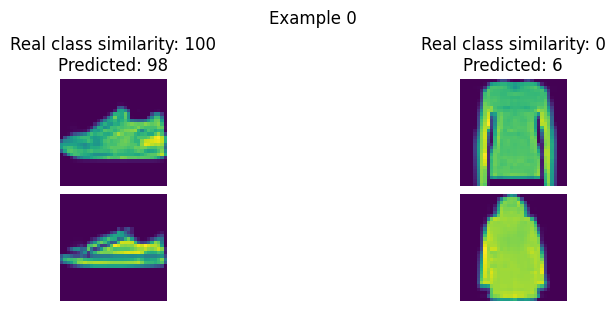

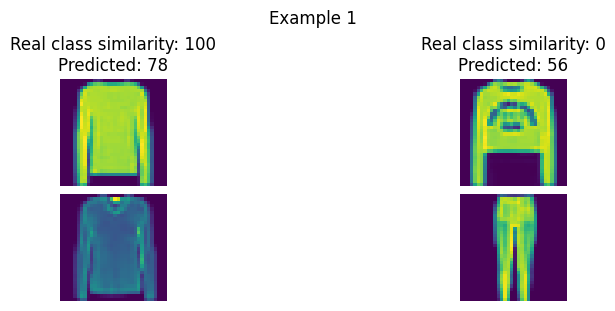

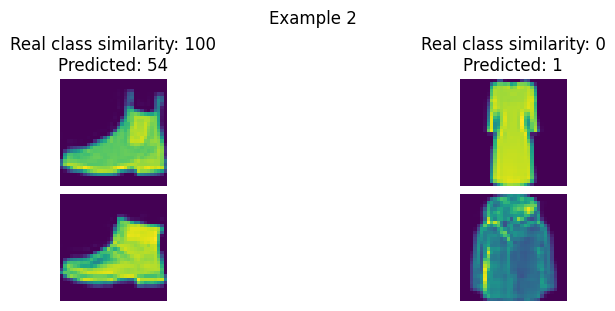

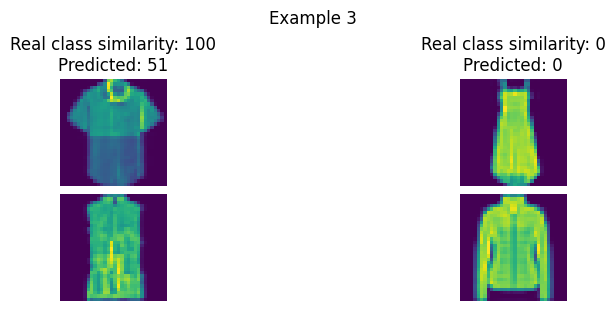

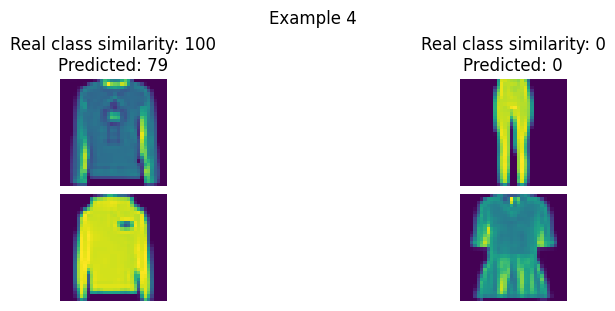

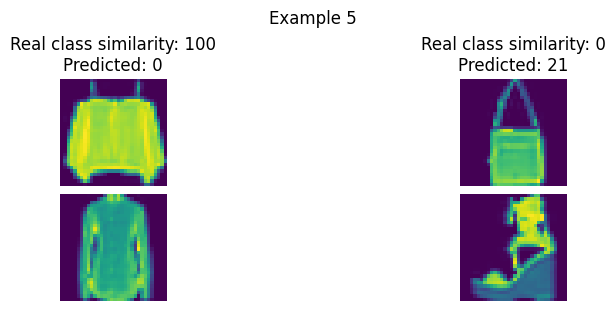

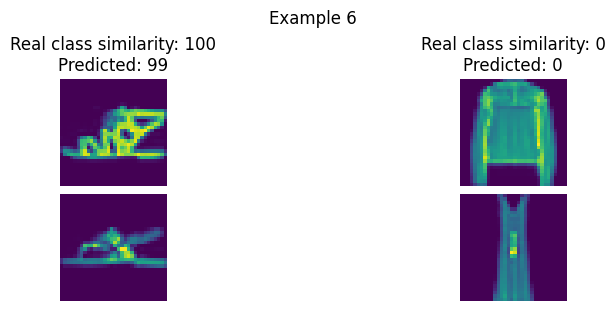

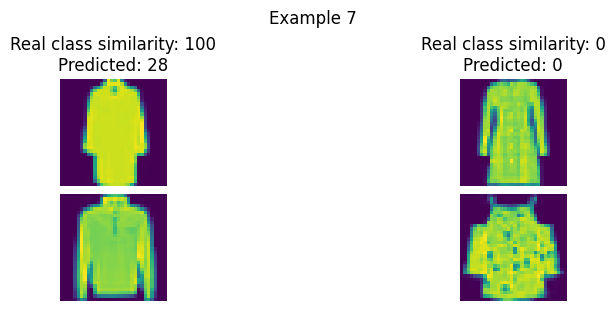

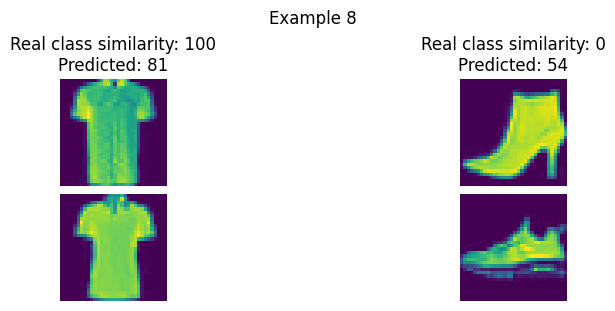

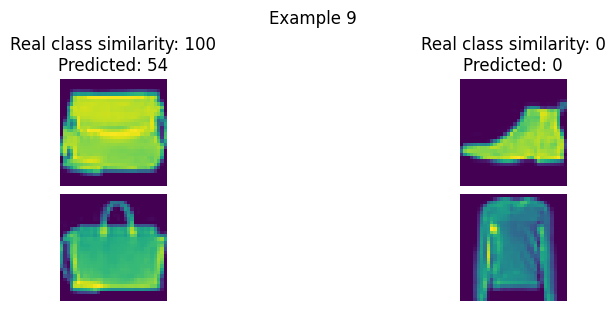

In [36]:
for i in range(10):
  _ = show_model_output(1, i)

In [37]:
%%time
from sklearn.manifold import TSNE
x_test_features = model.predict(x_test, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

79/79 [==============================] - 0s 2ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 5.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 15.541269
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.866714
[t-SNE] KL divergence aft

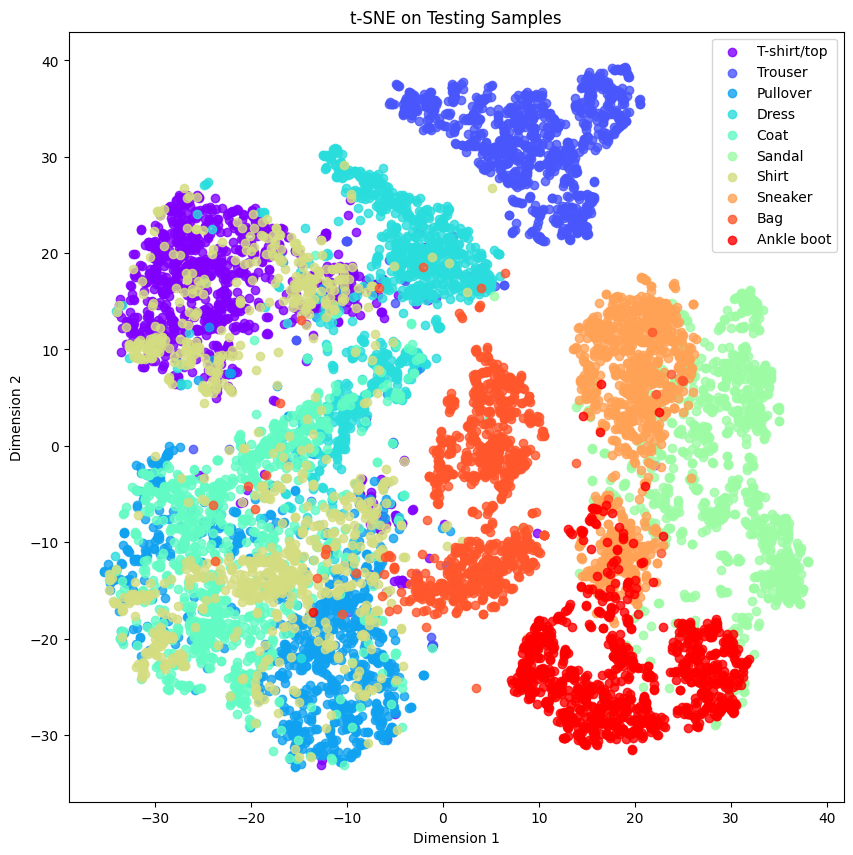

In [38]:
obj_categories = [  
                    'T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(y_test == c_group), 0],
        tsne_features[np.where(y_test == c_group), 1],
        marker='o',
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes-dist.png')
plt.show(block=False)